In [1]:
import numpy as np
import pandas as pd
from scipy.sparse import random
from datafold.dynfold import DMDFull, DMDEco
import matplotlib.pyplot as plt

## Example 13 from Applied Koopmanism: Linear diagonalizable system

Consider A as a matrix which has a complete set of eigen vectors and the system:
x_{m+1} = Ax_{m} - <Ax,x>.x/<x.x>

We use the Gram schmidt process to get linearly independent vectors in the proopagation of the dynamical system and consequently to make a Koopman matrix with large rank



### Generate data for the system

In [2]:
x_0 = np.random.rand(1000)   # 1000 - dimensional initial vector 
A = np.random.rand(1000, 1000)

In [3]:
A

array([[0.41710501, 0.04049634, 0.67801513, ..., 0.10980771, 0.94400724,
        0.7181237 ],
       [0.30014121, 0.26742659, 0.60291582, ..., 0.19434017, 0.76864322,
        0.56223778],
       [0.31533104, 0.76842464, 0.02896105, ..., 0.88594064, 0.75178886,
        0.1827547 ],
       ...,
       [0.57870576, 0.77282662, 0.52294536, ..., 0.43648515, 0.34092572,
        0.96933114],
       [0.40393777, 0.09356929, 0.69342714, ..., 0.60048027, 0.87218242,
        0.38580243],
       [0.08214664, 0.70038965, 0.1746308 , ..., 0.90370202, 0.75549785,
        0.57401936]])

In [4]:
np.linalg.matrix_rank(A)

1000

In [5]:
np.linalg.cond(A)

78037.23619292326

In [6]:
x = x_0/np.linalg.norm(x_0)
data_matrix_all = np.zeros((1000,1001))
data_matrix_all[:,0] =  x

# data_matrix = x.reshape(1000,1)
# data_matrix_shifted = np.empty((1000,0))

for i in range(0,1000):
    y = A@x
    for j in range(0,i+1):
        y -= np.dot(data_matrix_all[:, j], y) / np.dot(data_matrix_all[:,j], data_matrix_all[:, j]) * data_matrix_all[:, j]
    
    y = y/np.linalg.norm(y)
    data_matrix_all[:, i+1] = y
    x= y 



###### By construction eigen vectors of this data matrix will be the columns?

In [7]:
data_matrix_all.shape[0]-1

999

In [8]:
data_matrix = data_matrix_all[:, 0:data_matrix_all.shape[1]-1]
data_matrix_shifted = data_matrix_all[:, 1:data_matrix_all.shape[1]]

data_matrix.shape, data_matrix_shifted.shape, data_matrix_all.shape

((1000, 1000), (1000, 1000), (1000, 1001))

In [9]:
data_matrix

array([[ 0.02067928,  0.02650134,  0.03075547, ..., -0.03374654,
         0.01619033, -0.02464739],
       [ 0.03697332, -0.00125106, -0.03118779, ..., -0.02863575,
        -0.02881436,  0.02150101],
       [ 0.02900218,  0.01219885, -0.00208675, ..., -0.03333877,
         0.02118985,  0.05905646],
       ...,
       [ 0.00340254,  0.05812681, -0.04283191, ..., -0.05387712,
        -0.02690049,  0.06096593],
       [ 0.01537158,  0.03658964, -0.00909287, ..., -0.06712001,
         0.02439922,  0.01158145],
       [ 0.0356476 ,  0.00232181,  0.00819601, ...,  0.02750624,
        -0.00299697,  0.01474624]])

In [10]:
np.linalg.matrix_rank(data_matrix), np.linalg.matrix_rank(data_matrix_shifted)

(1000, 1000)

In [11]:
np.isnan(data_matrix).sum(), np.isnan(data_matrix_shifted).sum()

(0, 0)

In [12]:
data_matrix.shape

(1000, 1000)

In [211]:
# check if shifted matrices are constructed correctly
for i in range(0, data_matrix.shape[1]-1):
    if (data_matrix[:,i+1] != data_matrix_shifted[:,i]).any():
        print(i)

In [212]:
np.linalg.pinv(data_matrix)

array([[ 0.02067928,  0.03697332,  0.02900218, ...,  0.00340254,
         0.01537158,  0.0356476 ],
       [ 0.02650134, -0.00125106,  0.01219885, ...,  0.05812681,
         0.03658964,  0.00232181],
       [ 0.03075547, -0.03118779, -0.00208675, ..., -0.04283191,
        -0.00909287,  0.00819601],
       ...,
       [-0.03374654, -0.02863575, -0.03333877, ..., -0.05387712,
        -0.06712001,  0.02750624],
       [ 0.01619033, -0.02881436,  0.02118985, ..., -0.02690049,
         0.02439922, -0.00299697],
       [-0.02464739,  0.02150101,  0.05905646, ...,  0.06096593,
         0.01158145,  0.01474624]])

In [213]:
np.linalg.matrix_rank(data_matrix)

1000

In [214]:
np.linalg.cond(data_matrix),np.linalg.cond(data_matrix_shifted)

(1.000000000001501, 1.7067274355992563)

### Generate Koopman matrix

In [245]:
koopman_matrix = data_matrix_shifted @ np.linalg.pinv(data_matrix)
koopman_matrix.shape

(1000, 1000)

In [18]:
koopman_matrix

array([[ 0.01001596, -0.00168487,  0.02372077, ..., -0.00194804,
         0.02665324,  0.01865422],
       [ 0.00669131, -0.00506551,  0.05516173, ..., -0.04846083,
         0.05281786,  0.00995317],
       [-0.02532537,  0.01848706, -0.04317773, ...,  0.05585906,
         0.03881346,  0.00148133],
       ...,
       [-0.01375359,  0.03441412, -0.01991044, ...,  0.01095444,
        -0.01620264,  0.04847635],
       [-0.00870703, -0.05120617,  0.0337619 , ..., -0.04454311,
         0.0196378 , -0.00587709],
       [-0.02957988, -0.00411124,  0.00399867, ...,  0.04824797,
         0.03854753, -0.02891028]])

In [19]:
np.linalg.matrix_rank(koopman_matrix)

1000

In [20]:
np.linalg.cond(koopman_matrix)

1.7067274355997375

#### Eigenvalue decomposition

In [21]:
eigenvalues_eigdecom, eigenvectors_eigdecom = np.linalg.eig(koopman_matrix)
np.max(eigenvalues_eigdecom)

(1.0002297105239277+0.031014077767617373j)

In [22]:
eigenvalues_eigdecom

array([ 7.20218517e-01+0.69235636j,  7.20218517e-01-0.69235636j,
        7.16100373e-01+0.69799956j,  7.16100373e-01-0.69799956j,
        7.02753263e-01+0.71132993j,  7.02753263e-01-0.71132993j,
        7.07621954e-01+0.70691933j,  7.07621954e-01-0.70691933j,
        7.11951527e-01+0.70220259j,  7.11951527e-01-0.70220259j,
        6.98562747e-01+0.71590447j,  6.98562747e-01-0.71590447j,
        7.24583128e-01+0.68907969j,  7.24583128e-01-0.68907969j,
        7.29428942e-01+0.68420341j,  7.29428942e-01-0.68420341j,
        6.93680249e-01+0.7199722j ,  6.93680249e-01-0.7199722j ,
        6.89150061e-01+0.7246402j ,  6.89150061e-01-0.7246402j ,
        7.33409033e-01+0.67882818j,  7.33409033e-01-0.67882818j,
        6.84221639e-01+0.72843733j,  6.84221639e-01-0.72843733j,
        6.80337609e-01+0.73278014j,  6.80337609e-01-0.73278014j,
        7.37309244e-01+0.67508927j,  7.37309244e-01-0.67508927j,
        6.75068596e-01+0.73764696j,  6.75068596e-01-0.73764696j,
        7.41704399e-01+0.

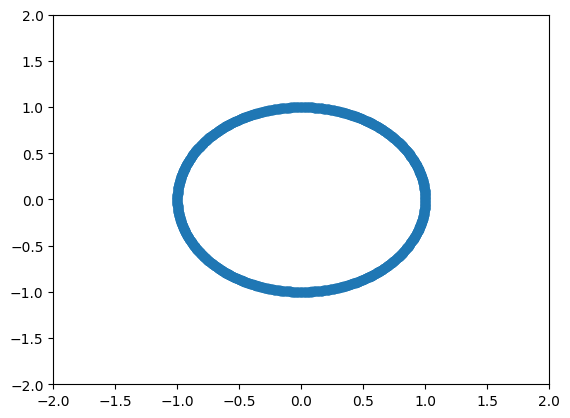

In [31]:
plt.scatter(eigenvalues_eigdecom.real, eigenvalues_eigdecom.imag)

# Set the axis limits
plt.xlim([-2, 2])
plt.ylim([-2, 2])

# Show the plot
plt.show()

In [32]:
eigenvalues_eigdecom

array([ 7.20218517e-01+0.69235636j,  7.20218517e-01-0.69235636j,
        7.16100373e-01+0.69799956j,  7.16100373e-01-0.69799956j,
        7.02753263e-01+0.71132993j,  7.02753263e-01-0.71132993j,
        7.07621954e-01+0.70691933j,  7.07621954e-01-0.70691933j,
        7.11951527e-01+0.70220259j,  7.11951527e-01-0.70220259j,
        6.98562747e-01+0.71590447j,  6.98562747e-01-0.71590447j,
        7.24583128e-01+0.68907969j,  7.24583128e-01-0.68907969j,
        7.29428942e-01+0.68420341j,  7.29428942e-01-0.68420341j,
        6.93680249e-01+0.7199722j ,  6.93680249e-01-0.7199722j ,
        6.89150061e-01+0.7246402j ,  6.89150061e-01-0.7246402j ,
        7.33409033e-01+0.67882818j,  7.33409033e-01-0.67882818j,
        6.84221639e-01+0.72843733j,  6.84221639e-01-0.72843733j,
        6.80337609e-01+0.73278014j,  6.80337609e-01-0.73278014j,
        7.37309244e-01+0.67508927j,  7.37309244e-01-0.67508927j,
        6.75068596e-01+0.73764696j,  6.75068596e-01-0.73764696j,
        7.41704399e-01+0.

In [33]:
np.real(eigenvalues_eigdecom)

array([ 7.20218517e-01,  7.20218517e-01,  7.16100373e-01,  7.16100373e-01,
        7.02753263e-01,  7.02753263e-01,  7.07621954e-01,  7.07621954e-01,
        7.11951527e-01,  7.11951527e-01,  6.98562747e-01,  6.98562747e-01,
        7.24583128e-01,  7.24583128e-01,  7.29428942e-01,  7.29428942e-01,
        6.93680249e-01,  6.93680249e-01,  6.89150061e-01,  6.89150061e-01,
        7.33409033e-01,  7.33409033e-01,  6.84221639e-01,  6.84221639e-01,
        6.80337609e-01,  6.80337609e-01,  7.37309244e-01,  7.37309244e-01,
        6.75068596e-01,  6.75068596e-01,  7.41704399e-01,  7.41704399e-01,
        7.45789406e-01,  7.45789406e-01,  6.70228470e-01,  6.70228470e-01,
        6.66291410e-01,  6.66291410e-01,  6.61491373e-01,  6.61491373e-01,
       -7.46429773e-01, -7.46429773e-01, -7.41874341e-01, -7.41874341e-01,
       -7.32949812e-01, -7.32949812e-01, -7.29439119e-01, -7.29439119e-01,
       -7.38124657e-01, -7.38124657e-01, -7.24078285e-01, -7.24078285e-01,
       -7.20639708e-01, -

In [34]:
eigenvectors_eigdecom.shape

(1000, 1000)

### norm of Kv - \lambdav

In [53]:
eigenvalues_eigdecom.shape

(1000,)

#### Magnitude of koopman modes - why is it one for all?

In [110]:
np.linalg.norm(eigenvectors_eigdecom, axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [142]:
for i in range(eigenvalues_eigdecom.shape[0]):
    e = np.linalg.norm(koopman_matrix@eigenvectors_eigdecom[:,i] - eigenvalues_eigdecom[i]*eigenvectors_eigdecom[:,i])
    print(f"eigen value: {eigenvalues_eigdecom[i]}-- norm error: {e}")

eigen value: (0.7202185174128275+0.6923563574435778j)-- norm error: 1.489715030712696e-14
eigen value: (0.7202185174128275-0.6923563574435778j)-- norm error: 1.489715030712696e-14
eigen value: (0.7161003728566608+0.6979995633060034j)-- norm error: 1.4058364344303774e-14
eigen value: (0.7161003728566608-0.6979995633060034j)-- norm error: 1.4058364344303774e-14
eigen value: (0.7027532630461333+0.711329928405178j)-- norm error: 1.6567780171114266e-14
eigen value: (0.7027532630461333-0.711329928405178j)-- norm error: 1.6567780171114266e-14
eigen value: (0.70762195427365+0.706919325483086j)-- norm error: 1.7318495692235313e-14
eigen value: (0.70762195427365-0.706919325483086j)-- norm error: 1.7318495692235313e-14
eigen value: (0.7119515274301729+0.7022025930846028j)-- norm error: 1.514199867667857e-14
eigen value: (0.7119515274301729-0.7022025930846028j)-- norm error: 1.514199867667857e-14
eigen value: (0.6985627472243406+0.7159044712751298j)-- norm error: 1.3521104108753573e-14
eigen value

eigen value: (-0.6230623151037963+0.7826177282871416j)-- norm error: 1.5134969161353644e-14
eigen value: (-0.6230623151037963-0.7826177282871416j)-- norm error: 1.5134969161353644e-14
eigen value: (0.6230112935498485+0.7811970921075142j)-- norm error: 1.8045712418057147e-14
eigen value: (0.6230112935498485-0.7811970921075142j)-- norm error: 1.8045712418057147e-14
eigen value: (-0.778480558368682+0.627642577063616j)-- norm error: 1.8708869456450882e-14
eigen value: (-0.778480558368682-0.627642577063616j)-- norm error: 1.8708869456450882e-14
eigen value: (-0.782767866614154+0.6228170940501149j)-- norm error: 1.6351166938616615e-14
eigen value: (-0.782767866614154-0.6228170940501149j)-- norm error: 1.6351166938616615e-14
eigen value: (-0.6178807537284774+0.7863441729656377j)-- norm error: 2.6291884051847576e-14
eigen value: (-0.6178807537284774-0.7863441729656377j)-- norm error: 2.6291884051847576e-14
eigen value: (-0.7862119066070443+0.6171949497790019j)-- norm error: 1.999504299822154e-

eigen value: (0.8372977490841086-0.5458633007344673j)-- norm error: 1.579105871069886e-14
eigen value: (-0.5356364304290929+0.8448502466529847j)-- norm error: 1.8535902913649596e-14
eigen value: (-0.5356364304290929-0.8448502466529847j)-- norm error: 1.8535902913649596e-14
eigen value: (-0.8444150951236638+0.5362068819435533j)-- norm error: 1.7453721931786377e-14
eigen value: (-0.8444150951236638-0.5362068819435533j)-- norm error: 1.7453721931786377e-14
eigen value: (0.5403873610942707+0.8412014322823586j)-- norm error: 1.490562372109658e-14
eigen value: (0.5403873610942707-0.8412014322823586j)-- norm error: 1.490562372109658e-14
eigen value: (0.8408388274685115+0.5405767008559421j)-- norm error: 2.4906016582062832e-14
eigen value: (0.8408388274685115-0.5405767008559421j)-- norm error: 2.4906016582062832e-14
eigen value: (0.8433417845388225+0.5349983820851882j)-- norm error: 1.7597972290946983e-14
eigen value: (0.8433417845388225-0.5349983820851882j)-- norm error: 1.7597972290946983e-1

eigen value: (-0.896754596832525-0.4433371622980275j)-- norm error: 1.8105659522872432e-14
eigen value: (0.8930164984392582+0.4478244124197821j)-- norm error: 1.5117478750601908e-14
eigen value: (0.8930164984392582-0.4478244124197821j)-- norm error: 1.5117478750601908e-14
eigen value: (-0.8994295752436594+0.4368701570476326j)-- norm error: 1.9431538005132616e-14
eigen value: (-0.8994295752436594-0.4368701570476326j)-- norm error: 1.9431538005132616e-14
eigen value: (0.44240248374360824+0.8962618228642629j)-- norm error: 1.5367956893175972e-14
eigen value: (0.44240248374360824-0.8962618228642629j)-- norm error: 1.5367956893175972e-14
eigen value: (0.4368167911533249+0.8991880860928517j)-- norm error: 1.8054920049413594e-14
eigen value: (0.4368167911533249-0.8991880860928517j)-- norm error: 1.8054920049413594e-14
eigen value: (0.8956663376293018+0.4435654488164839j)-- norm error: 1.6189618801627137e-14
eigen value: (0.8956663376293018-0.4435654488164839j)-- norm error: 1.6189618801627137

eigen value: (0.9343006258608377+0.35730873144742814j)-- norm error: 2.109029636247706e-14
eigen value: (0.9343006258608377-0.35730873144742814j)-- norm error: 2.109029636247706e-14
eigen value: (0.3508844237946408+0.9367458517226356j)-- norm error: 1.403680272504192e-14
eigen value: (0.3508844237946408-0.9367458517226356j)-- norm error: 1.403680272504192e-14
eigen value: (-0.9367987835151523+0.35052983173857877j)-- norm error: 1.8317183976756157e-14
eigen value: (-0.9367987835151523-0.35052983173857877j)-- norm error: 1.8317183976756157e-14
eigen value: (0.9366162802966709+0.35083032288829247j)-- norm error: 1.6942413539864842e-14
eigen value: (0.9366162802966709-0.35083032288829247j)-- norm error: 1.6942413539864842e-14
eigen value: (0.9390912481417788+0.34509471934004377j)-- norm error: 2.4278077493639106e-14
eigen value: (0.9390912481417788-0.34509471934004377j)-- norm error: 2.4278077493639106e-14
eigen value: (0.345001807339764+0.9382155791040894j)-- norm error: 1.436487860173360

eigen value: (0.2786701161286894-0.9601701724967386j)-- norm error: 1.426636649832473e-14
eigen value: (0.9566075161213565+0.29058503877840647j)-- norm error: 1.4202851395671096e-14
eigen value: (0.9566075161213565-0.29058503877840647j)-- norm error: 1.4202851395671096e-14
eigen value: (-0.28495099683067937+0.9585544455976246j)-- norm error: 1.513217735029625e-14
eigen value: (-0.28495099683067937-0.9585544455976246j)-- norm error: 1.513217735029625e-14
eigen value: (0.2730102229664023+0.9617541067779541j)-- norm error: 1.7891856744546673e-14
eigen value: (0.2730102229664023-0.9617541067779541j)-- norm error: 1.7891856744546673e-14
eigen value: (0.9571436252712652+0.2849958495662473j)-- norm error: 1.8412604384098342e-14
eigen value: (0.9571436252712652-0.2849958495662473j)-- norm error: 1.8412604384098342e-14
eigen value: (-0.2785551100001229+0.961140896325059j)-- norm error: 1.6725815747724293e-14
eigen value: (-0.2785551100001229-0.961140896325059j)-- norm error: 1.6725815747724293e

eigen value: (0.9857958717484785+0.16904769328186178j)-- norm error: 2.782657931716539e-14
eigen value: (0.9857958717484785-0.16904769328186178j)-- norm error: 2.782657931716539e-14
eigen value: (-0.9842573771830598+0.1753663169994421j)-- norm error: 2.111999842997427e-14
eigen value: (-0.9842573771830598-0.1753663169994421j)-- norm error: 2.111999842997427e-14
eigen value: (-0.985738120547526+0.1692888391012527j)-- norm error: 2.0660863207226076e-14
eigen value: (-0.985738120547526-0.1692888391012527j)-- norm error: 2.0660863207226076e-14
eigen value: (-0.1935475768690945+0.9812142793352404j)-- norm error: 1.6424510956206232e-14
eigen value: (-0.1935475768690945-0.9812142793352404j)-- norm error: 1.6424510956206232e-14
eigen value: (0.1874236718900819+0.9816832702471602j)-- norm error: 1.837845588560029e-14
eigen value: (0.1874236718900819-0.9816832702471602j)-- norm error: 1.837845588560029e-14
eigen value: (-0.18700074895312313+0.9826138705070689j)-- norm error: 1.703417082819133e-1

eigen value: (-0.08834809119260023+0.9952148082836992j)-- norm error: 1.4179414260411478e-14
eigen value: (-0.08834809119260023-0.9952148082836992j)-- norm error: 1.4179414260411478e-14
eigen value: (0.08767512703482197+0.9959262555554959j)-- norm error: 1.5107373868964114e-14
eigen value: (0.08767512703482197-0.9959262555554959j)-- norm error: 1.5107373868964114e-14
eigen value: (-0.08166373940477939+0.9966928211592431j)-- norm error: 1.8155912408540536e-14
eigen value: (-0.08166373940477939-0.9966928211592431j)-- norm error: 1.8155912408540536e-14
eigen value: (0.08184324912775987+0.9957526558658736j)-- norm error: 1.3779972173105211e-14
eigen value: (0.08184324912775987-0.9957526558658736j)-- norm error: 1.3779972173105211e-14
eigen value: (-0.07518778581122748+0.9971520492798029j)-- norm error: 2.032444817486879e-14
eigen value: (-0.07518778581122748-0.9971520492798029j)-- norm error: 2.032444817486879e-14
eigen value: (-0.018458819860461405+1.000087038114753j)-- norm error: 1.3941

In [143]:
np.allclose(koopman_matrix@eigenvectors_eigdecom[:,i], eigenvalues_eigdecom[i]*eigenvectors_eigdecom[:,i])

True

In [148]:
np.allclose(koopman_matrix@(eigenvectors_eigdecom[:,0]**2), 
            (eigenvalues_eigdecom[0]**2)*(eigenvectors_eigdecom[:,0]**2))

False

In [151]:
eig = eigenvalues_eigdecom[0]**2
eig

(0.03935738713179204+0.9972957385587186j)

In [138]:
for i in range(eigenvalues_eigdecom.shape[0]):
    e = np.linalg.norm(koopman_matrix@(eigenvectors_eigdecom[:,i]**2) 
                       - (eigenvalues_eigdecom[i]**2)*(eigenvectors_eigdecom[:,i]**2))
    print(f"eigen value: {eigenvalues_eigdecom[i]}-- norm error: {e}")

eigen value: (0.7202185174128275+0.6923563574435778j)-- norm error: 0.06132113959329348
eigen value: (0.7202185174128275-0.6923563574435778j)-- norm error: 0.06132113959329348
eigen value: (0.7161003728566608+0.6979995633060034j)-- norm error: 0.06560655591483416
eigen value: (0.7161003728566608-0.6979995633060034j)-- norm error: 0.06560655591483416
eigen value: (0.7027532630461333+0.711329928405178j)-- norm error: 0.06564892346783592
eigen value: (0.7027532630461333-0.711329928405178j)-- norm error: 0.06564892346783592
eigen value: (0.70762195427365+0.706919325483086j)-- norm error: 0.06525110761991898
eigen value: (0.70762195427365-0.706919325483086j)-- norm error: 0.06525110761991898
eigen value: (0.7119515274301729+0.7022025930846028j)-- norm error: 0.06309758483935829
eigen value: (0.7119515274301729-0.7022025930846028j)-- norm error: 0.06309758483935829
eigen value: (0.6985627472243406+0.7159044712751298j)-- norm error: 0.06335550156834364
eigen value: (0.6985627472243406-0.71590

eigen value: (-0.5874417278510766-0.8095502497559331j)-- norm error: 0.06159090358770606
eigen value: (-0.8126567725357121+0.5829318327421658j)-- norm error: 0.06348153711994597
eigen value: (-0.8126567725357121-0.5829318327421658j)-- norm error: 0.06348153711994597
eigen value: (-0.8163683321976937+0.5777880601164048j)-- norm error: 0.06201079841680229
eigen value: (-0.8163683321976937-0.5777880601164048j)-- norm error: 0.06201079841680229
eigen value: (0.8049924093556827+0.5922742725858982j)-- norm error: 0.06272175701270653
eigen value: (0.8049924093556827-0.5922742725858982j)-- norm error: 0.06272175701270653
eigen value: (-0.5821691337707688+0.813150730819859j)-- norm error: 0.06318060566195838
eigen value: (-0.5821691337707688-0.813150730819859j)-- norm error: 0.06318060566195838
eigen value: (-0.5777404750667849+0.8161902053871437j)-- norm error: 0.06352060247842232
eigen value: (-0.5777404750667849-0.8161902053871437j)-- norm error: 0.06352060247842232
eigen value: (0.587598083

eigen value: (-0.8851403586930292-0.4651705892402917j)-- norm error: 0.0623751069005973
eigen value: (-0.8879700867628693+0.45994713273607324j)-- norm error: 0.06403677600557232
eigen value: (-0.8879700867628693-0.45994713273607324j)-- norm error: 0.06403677600557232
eigen value: (-0.46427221477266856+0.8842410037845275j)-- norm error: 0.06343840783674612
eigen value: (-0.46427221477266856-0.8842410037845275j)-- norm error: 0.06343840783674612
eigen value: (-0.45928397551261146+0.8887390755388456j)-- norm error: 0.0632291974504834
eigen value: (-0.45928397551261146-0.8887390755388456j)-- norm error: 0.0632291974504834
eigen value: (0.8869926810148996+0.45993609779349387j)-- norm error: 0.06215511242351905
eigen value: (0.8869926810148996-0.45993609779349387j)-- norm error: 0.06215511242351905
eigen value: (-0.8910775949384326+0.4542189639646546j)-- norm error: 0.061300656327142544
eigen value: (-0.8910775949384326-0.4542189639646546j)-- norm error: 0.061300656327142544
eigen value: (0.

eigen value: (0.33924795793524787+0.9403224600593306j)-- norm error: 0.06404376620021655
eigen value: (0.33924795793524787-0.9403224600593306j)-- norm error: 0.06404376620021655
eigen value: (-0.9385698431331135+0.3445644502128581j)-- norm error: 0.06325086081204644
eigen value: (-0.9385698431331135-0.3445644502128581j)-- norm error: 0.06325086081204644
eigen value: (-0.34428294926780256+0.9388858033403022j)-- norm error: 0.06253183660237516
eigen value: (-0.34428294926780256-0.9388858033403022j)-- norm error: 0.06253183660237516
eigen value: (0.3331010066638014+0.9429231812119894j)-- norm error: 0.06309454403401063
eigen value: (0.3331010066638014-0.9429231812119894j)-- norm error: 0.06309454403401063
eigen value: (-0.9408834543922064+0.3385599114216586j)-- norm error: 0.06161932922200078
eigen value: (-0.9408834543922064-0.3385599114216586j)-- norm error: 0.06161932922200078
eigen value: (-0.3328656635178411+0.9425141160808013j)-- norm error: 0.06391228807009032
eigen value: (-0.3328

eigen value: (-0.9832249007528893-0.18117980386386298j)-- norm error: 0.06529824340017841
eigen value: (0.9857958717484785+0.16904769328186178j)-- norm error: 0.06293827223582202
eigen value: (0.9857958717484785-0.16904769328186178j)-- norm error: 0.06293827223582202
eigen value: (-0.9842573771830598+0.1753663169994421j)-- norm error: 0.06360686438847649
eigen value: (-0.9842573771830598-0.1753663169994421j)-- norm error: 0.06360686438847649
eigen value: (-0.985738120547526+0.1692888391012527j)-- norm error: 0.06323709586802431
eigen value: (-0.985738120547526-0.1692888391012527j)-- norm error: 0.06323709586802431
eigen value: (-0.1935475768690945+0.9812142793352404j)-- norm error: 0.06370693983510575
eigen value: (-0.1935475768690945-0.9812142793352404j)-- norm error: 0.06370693983510575
eigen value: (0.1874236718900819+0.9816832702471602j)-- norm error: 0.06318743766518674
eigen value: (0.1874236718900819-0.9816832702471602j)-- norm error: 0.06318743766518674
eigen value: (-0.1870007

eigen value: (0.9996310823609897-0.005604501065158706j)-- norm error: 0.06430700782103022
eigen value: (0.9984636501445926+0j)-- norm error: 0.07388784892038504
eigen value: (-0.09344838770667366+0.9954422510293589j)-- norm error: 0.06359896537367565
eigen value: (-0.09344838770667366-0.9954422510293589j)-- norm error: 0.06359896537367565
eigen value: (0.0941857693953999+0.9955146472473317j)-- norm error: 0.06267233399598304
eigen value: (0.0941857693953999-0.9955146472473317j)-- norm error: 0.06267233399598304
eigen value: (-0.08834809119260023+0.9952148082836992j)-- norm error: 0.06385622724698191
eigen value: (-0.08834809119260023-0.9952148082836992j)-- norm error: 0.06385622724698191
eigen value: (0.08767512703482197+0.9959262555554959j)-- norm error: 0.0631940996398546
eigen value: (0.08767512703482197-0.9959262555554959j)-- norm error: 0.0631940996398546
eigen value: (-0.08166373940477939+0.9966928211592431j)-- norm error: 0.06251795658894725
eigen value: (-0.08166373940477939-0.

In [139]:
for i in range(eigenvalues_eigdecom.shape[0]):
    e = np.linalg.norm(koopman_matrix@(eigenvectors_eigdecom[:,i]**2) 
                       - (eigenvalues_eigdecom[i]**2)*(eigenvectors_eigdecom[:,i]**2))
    print(f"eigen value: {eigenvalues_eigdecom[i]}-- norm error: {e}")

eigen value: (0.7202185174128275+0.6923563574435778j)-- norm error: 0.06132113959329348
eigen value: (0.7202185174128275-0.6923563574435778j)-- norm error: 0.06132113959329348
eigen value: (0.7161003728566608+0.6979995633060034j)-- norm error: 0.06560655591483416
eigen value: (0.7161003728566608-0.6979995633060034j)-- norm error: 0.06560655591483416
eigen value: (0.7027532630461333+0.711329928405178j)-- norm error: 0.06564892346783592
eigen value: (0.7027532630461333-0.711329928405178j)-- norm error: 0.06564892346783592
eigen value: (0.70762195427365+0.706919325483086j)-- norm error: 0.06525110761991898
eigen value: (0.70762195427365-0.706919325483086j)-- norm error: 0.06525110761991898
eigen value: (0.7119515274301729+0.7022025930846028j)-- norm error: 0.06309758483935829
eigen value: (0.7119515274301729-0.7022025930846028j)-- norm error: 0.06309758483935829
eigen value: (0.6985627472243406+0.7159044712751298j)-- norm error: 0.06335550156834364
eigen value: (0.6985627472243406-0.71590

eigen value: (0.7860230977685904+0.6182028841220497j)-- norm error: 0.06183292339361932
eigen value: (0.7860230977685904-0.6182028841220497j)-- norm error: 0.06183292339361932
eigen value: (0.6083395648702503+0.7938975027814517j)-- norm error: 0.06457128963156841
eigen value: (0.6083395648702503-0.7938975027814517j)-- norm error: 0.06457128963156841
eigen value: (0.7903149757659609+0.6126967796738423j)-- norm error: 0.06330440097360858
eigen value: (0.7903149757659609-0.6126967796738423j)-- norm error: 0.06330440097360858
eigen value: (-0.6027076517834874+0.7981388079351746j)-- norm error: 0.06281945097542026
eigen value: (-0.6027076517834874-0.7981388079351746j)-- norm error: 0.06281945097542026
eigen value: (0.6027443058808389+0.7984289370480521j)-- norm error: 0.0634189322265863
eigen value: (0.6027443058808389-0.7984289370480521j)-- norm error: 0.0634189322265863
eigen value: (-0.597659439281812+0.801726463030316j)-- norm error: 0.06125102043575982
eigen value: (-0.597659439281812-

eigen value: (-0.8699619955453863-0.49269190788418765j)-- norm error: 0.06350903646894678
eigen value: (-0.8729463368443542+0.487253456634347j)-- norm error: 0.06294111716273217
eigen value: (-0.8729463368443542-0.487253456634347j)-- norm error: 0.06294111716273217
eigen value: (0.49789114651258937+0.866056674300363j)-- norm error: 0.06539378187775584
eigen value: (0.49789114651258937-0.866056674300363j)-- norm error: 0.06539378187775584
eigen value: (-0.48118984440114226+0.8764748489125088j)-- norm error: 0.06532936155675675
eigen value: (-0.48118984440114226-0.8764748489125088j)-- norm error: 0.06532936155675675
eigen value: (0.873759732464716+0.4869035352987576j)-- norm error: 0.06400153205171054
eigen value: (0.873759732464716-0.4869035352987576j)-- norm error: 0.06400153205171054
eigen value: (0.49293296224574173+0.8695956086614515j)-- norm error: 0.06289659574814237
eigen value: (0.49293296224574173-0.8695956086614515j)-- norm error: 0.06289659574814237
eigen value: (-0.876156752

eigen value: (-0.38526872249792055+0.9226095242260282j)-- norm error: 0.06411948352444133
eigen value: (-0.38526872249792055-0.9226095242260282j)-- norm error: 0.06411948352444133
eigen value: (0.3857988660513546+0.9215484416791202j)-- norm error: 0.0644598832981521
eigen value: (0.3857988660513546-0.9215484416791202j)-- norm error: 0.0644598832981521
eigen value: (0.9222764143909173+0.3849970562130779j)-- norm error: 0.06357042832453753
eigen value: (0.9222764143909173-0.3849970562130779j)-- norm error: 0.06357042832453753
eigen value: (0.39107083582487917+0.919359518698685j)-- norm error: 0.062426387848307556
eigen value: (0.39107083582487917-0.919359518698685j)-- norm error: 0.062426387848307556
eigen value: (-0.9226033953458426+0.38567262630172094j)-- norm error: 0.06460125585755996
eigen value: (-0.9226033953458426-0.38567262630172094j)-- norm error: 0.06460125585755996
eigen value: (0.3804816116144985+0.9247908154765602j)-- norm error: 0.06301404806822349
eigen value: (0.38048161

eigen value: (-0.2785551100001229-0.961140896325059j)-- norm error: 0.06224861986015671
eigen value: (0.959903070014895+0.27929835260194796j)-- norm error: 0.06593438946111432
eigen value: (0.959903070014895-0.27929835260194796j)-- norm error: 0.06593438946111432
eigen value: (0.9620447291770298+0.2728621490947759j)-- norm error: 0.06324410742411254
eigen value: (0.9620447291770298-0.2728621490947759j)-- norm error: 0.06324410742411254
eigen value: (-0.2664813304549992+0.9640061427730447j)-- norm error: 0.06180608840391674
eigen value: (-0.2664813304549992-0.9640061427730447j)-- norm error: 0.06180608840391674
eigen value: (-0.2725084985993058+0.9612798815178428j)-- norm error: 0.06172872924572682
eigen value: (-0.2725084985993058-0.9612798815178428j)-- norm error: 0.06172872924572682
eigen value: (-0.2607453390590476+0.9647680526992197j)-- norm error: 0.063040968260409
eigen value: (-0.2607453390590476-0.9647680526992197j)-- norm error: 0.063040968260409
eigen value: (-0.2548658429691

eigen value: (-0.1935475768690945-0.9812142793352404j)-- norm error: 0.06370693983510575
eigen value: (0.1874236718900819+0.9816832702471602j)-- norm error: 0.06318743766518674
eigen value: (0.1874236718900819-0.9816832702471602j)-- norm error: 0.06318743766518674
eigen value: (-0.18700074895312313+0.9826138705070689j)-- norm error: 0.06310412957718402
eigen value: (-0.18700074895312313-0.9826138705070689j)-- norm error: 0.06310412957718402
eigen value: (0.18190045409817235+0.983649109819992j)-- norm error: 0.06441396789185988
eigen value: (0.18190045409817235-0.983649109819992j)-- norm error: 0.06441396789185988
eigen value: (-0.18042172103125875+0.98295750540343j)-- norm error: 0.06390393154583547
eigen value: (-0.18042172103125875-0.98295750540343j)-- norm error: 0.06390393154583547
eigen value: (-0.1747428638822761+0.983923477469033j)-- norm error: 0.06253180230437558
eigen value: (-0.1747428638822761-0.983923477469033j)-- norm error: 0.06253180230437558
eigen value: (0.16907973500

In [79]:
for i in range(eigenvalues_eigdecom.shape[0]):
    e = np.linalg.norm(koopman_matrix@(eigenvectors_eigdecom[:,i]*eigenvectors_eigdecom[:,i+1]) 
                       - (eigenvalues_eigdecom[i]*eigenvalues_eigdecom[i+1])*(eigenvectors_eigdecom[:,i]*eigenvectors_eigdecom[:,i+1]))
    print(e)

0.05373734550679463
0.04443528017499362
0.05846909883860484
0.04494906796736417
0.057304479305335804
0.044865167098267475
0.05673016398673728
0.04458759482048217
0.05554976634371895
0.04447910123680333
0.05533375397852012
0.04523513878785418
0.05722862262012255
0.04492596166912884
0.05458236108536238
0.043209557383819194
0.05577556240468177
0.04509774240305974
0.053307743944405524
0.04398374685333495
0.05631929381513526
0.044296681413216125
0.052051569536964507
0.0466017535319983
0.056772137476349224
0.04214740975196913
0.05631028510666989
0.04319137257397591
0.055747405304270185
0.04427750554670395
0.05311349286330515
0.04635105644856857
0.0554063222780847
0.04380979553188258
0.057591480876308554
0.0451528989708959
0.05564442601113301
0.04461919461225042
0.05598930808102846
0.043712444827151406
0.05832163472317617
0.045100819891426135
0.057187325436072564
0.046974858497048036
0.054050404914530364
0.04727356466437749
0.05606845572727585
0.04467966645375338
0.05412499772686217
0.0456422

0.055810860606228856
0.046852875470408964
0.056338256448333915
0.04383032130606759
0.053989832590325915
0.04396822321257672
0.05655220789468615
0.04485641061267879
0.055167605197254735
0.04563270441189642
0.05613864156220119
0.04485843904874769
0.057509355375364835
0.04387253031208609
0.05620170388279884
0.04433742198605517
0.05690036156252177
0.044067573615627444
0.05711139432669051
0.04487695816787401
0.056797310655056006
0.044674466233305565
0.05661031216279506
0.045649308834819796
0.05423863585666158
0.04654812895864868
0.05479011215933257
0.04488709366753891
0.05443209362537319
0.043830861918669986
0.056171097797229896
0.043948230416979685
0.05427307381942201
0.046380837114742245
0.05497957387960747
0.045637234554067777
0.05728302260296853
0.045720655778996554
0.05639534683054298
0.04352673405301806
0.05722812249681638
0.04373718811425383
0.05764010677825983
0.04415597380197965
0.05358958592363135
0.04346718451750638
0.054975234843815855
0.04458584897864188
0.05595244629769013
0.0

IndexError: index 1000 is out of bounds for axis 1 with size 1000

In [172]:
(data_matrix@eigenvectors_eigdecom)

(1000, 1000)

In [177]:
for i in range(eigenvalues_eigdecom.shape[0]):
    e = np.linalg.norm(koopman_matrix@((eigenvectors_eigdecom@data_matrix)[:,i]**2) 
                       - (eigenvalues_eigdecom[i]**2)*(eigenvectors_eigdecom[:,i]**2))
    print(f"eigen value: {eigenvalues_eigdecom[i]}-- norm error: {e}")
    

eigen value: (0.7202185174128275+0.6923563574435778j)-- norm error: 0.06963344149022017
eigen value: (0.7202185174128275-0.6923563574435778j)-- norm error: 0.06509063941286213
eigen value: (0.7161003728566608+0.6979995633060034j)-- norm error: 0.06399962505459794
eigen value: (0.7161003728566608-0.6979995633060034j)-- norm error: 0.062369015981377667
eigen value: (0.7027532630461333+0.711329928405178j)-- norm error: 0.06293540501637036
eigen value: (0.7027532630461333-0.711329928405178j)-- norm error: 0.06457494886555516
eigen value: (0.70762195427365+0.706919325483086j)-- norm error: 0.06352421225347821
eigen value: (0.70762195427365-0.706919325483086j)-- norm error: 0.06473115367418357
eigen value: (0.7119515274301729+0.7022025930846028j)-- norm error: 0.06348605220492104
eigen value: (0.7119515274301729-0.7022025930846028j)-- norm error: 0.06383255220618957
eigen value: (0.6985627472243406+0.7159044712751298j)-- norm error: 0.06339246917056572
eigen value: (0.6985627472243406-0.7159

eigen value: (-0.7580813158392083+0.6520627627626231j)-- norm error: 0.06320164165958728
eigen value: (-0.7580813158392083-0.6520627627626231j)-- norm error: 0.06241760271260992
eigen value: (-0.7628957433456564+0.647304536259997j)-- norm error: 0.06400583294471668
eigen value: (-0.7628957433456564-0.647304536259997j)-- norm error: 0.06352188259056886
eigen value: (-0.656109410943462+0.7544048537632738j)-- norm error: 0.06301709831369089
eigen value: (-0.656109410943462-0.7544048537632738j)-- norm error: 0.06246627812373354
eigen value: (-0.6511374133997075+0.7583203995485415j)-- norm error: 0.06247251650916936
eigen value: (-0.6511374133997075-0.7583203995485415j)-- norm error: 0.06361551556653776
eigen value: (0.6422423724208318+0.7665223653413171j)-- norm error: 0.06450063654668885
eigen value: (0.6422423724208318-0.7665223653413171j)-- norm error: 0.06321750404636758
eigen value: (-0.7667791868298078+0.6423627138663771j)-- norm error: 0.06312299567517574
eigen value: (-0.7667791868

eigen value: (-0.8054660585708633+0.5931533742871865j)-- norm error: 0.06301633291594418
eigen value: (-0.8054660585708633-0.5931533742871865j)-- norm error: 0.061833107685045484
eigen value: (0.5926256000431515+0.8050647326933157j)-- norm error: 0.06476090401696577
eigen value: (0.5926256000431515-0.8050647326933157j)-- norm error: 0.0644788176857388
eigen value: (0.8017362800094898+0.597646303001668j)-- norm error: 0.06338428860522409
eigen value: (0.8017362800094898-0.597646303001668j)-- norm error: 0.06213207704849145
eigen value: (-0.8089074360590001+0.5879282467605191j)-- norm error: 0.06361474228921987
eigen value: (-0.8089074360590001-0.5879282467605191j)-- norm error: 0.06330047080253982
eigen value: (-0.5874417278510766+0.8095502497559331j)-- norm error: 0.06462824799351571
eigen value: (-0.5874417278510766-0.8095502497559331j)-- norm error: 0.06353087835783397
eigen value: (-0.8126567725357121+0.5829318327421658j)-- norm error: 0.06287738448651195


KeyboardInterrupt: 

### Power iteration

In [27]:
def power_iteration(A, max_iterations = 10000, tolerance=1e-6):
    eig_old = 0
    x = np.random.rand(A.shape[1])
    x = x/np.linalg.norm(x)
    for i in range(max_iterations):
        y = np.dot(A, x)
        norm = np.linalg.norm(y)
        x = y / norm 
        eigenvalue = np.dot(np.dot(x, A), x.T)
        if np.abs(eig_old - eigenvalue) < tolerance:
            return x, eigenvalue
        else:
            eig_old = eigenvalue
    
    print("max iter reached", eig_old - eigenvalue)
    return x, eigenvalue

In [28]:
def power_iteration_with_deflation(A, num_eigen, num_iterations):
    eigs = []
    
    for i in range(num_eigen):
        eigvec, eigvalue = power_iteration(A, num_iterations)
        eigs.append((eigvec, eigvalue))
        A = A - eigvec@eigvec.T

In [29]:
def deflate_matrix(A, vec):
    return A - vec@vec.T

In [30]:
eigenvec, eigenvalue = power_iteration(koopman_matrix)
eigenvec, eigenvalue

(array([ 6.42596310e-03,  2.02788537e-02, -3.51450653e-02,  3.40176532e-02,
         1.40051968e-02, -1.37334033e-02,  2.45400889e-02,  4.24579250e-02,
        -1.62830395e-02,  1.35055777e-02,  4.84138035e-02,  1.60937037e-02,
         7.44361886e-03,  2.82845626e-02, -6.15588662e-02,  5.86265512e-03,
        -6.76688042e-02,  1.50706212e-02,  5.45467536e-03,  1.24807730e-02,
        -1.28132003e-02,  6.06866850e-04, -3.90590673e-02, -8.01972043e-03,
         1.65592146e-02,  3.54614398e-02,  1.07155104e-02, -3.56010374e-02,
        -5.69068303e-02, -3.69105267e-02,  9.82697641e-03, -1.79799087e-02,
         5.38355220e-02, -1.45709794e-02, -2.28504498e-02,  2.31325857e-02,
        -4.51759821e-03, -2.02576557e-02,  1.00513938e-02,  1.66279090e-02,
        -4.58447160e-02, -3.81415845e-02, -1.50599667e-02,  2.29519087e-02,
        -5.39869971e-02,  6.52057388e-03, -2.20012431e-02, -3.90936338e-03,
         1.46099278e-02,  4.80432651e-02, -1.04889470e-02, -5.46545263e-03,
         3.1

In [1468]:
power_iteration(deflate_matrix(A, eigenvec), num_iterations=1000)

(array([0.03140779, 0.03127007, 0.03146819, 0.0309498 , 0.03226992,
        0.03146917, 0.03217037, 0.03255576, 0.03139241, 0.03234664,
        0.03129686, 0.03214685, 0.03161835, 0.03232447, 0.03127393,
        0.03140261, 0.03136505, 0.03202918, 0.0318622 , 0.03208197,
        0.03189523, 0.03166091, 0.03172998, 0.03174912, 0.0318214 ,
        0.0315468 , 0.03193899, 0.03136007, 0.03113903, 0.03148496,
        0.03062183, 0.03167525, 0.03213403, 0.03172998, 0.03079613,
        0.03184968, 0.03174761, 0.03103579, 0.03191873, 0.0319674 ,
        0.03133413, 0.03139868, 0.03143535, 0.03071717, 0.03167813,
        0.03188614, 0.03122827, 0.03213441, 0.02995052, 0.03176223,
        0.03048768, 0.03103898, 0.03176886, 0.03177695, 0.03282833,
        0.03195129, 0.03110744, 0.03219572, 0.03206577, 0.0320398 ,
        0.03045511, 0.03072066, 0.03217689, 0.03106628, 0.03255087,
        0.03204955, 0.03147758, 0.0327476 , 0.03133281, 0.03060243,
        0.03133684, 0.03138387, 0.03208672, 0.03

### QR decomposition

In [1457]:
Q, R = np.linalg.qr(koopman_matrix)

In [1458]:
np.linalg.eigvals(R)

array([ 0.99999978, -0.99991842, -0.99999871,  0.99940753, -1.00007934,
        1.00022874,  1.00044638, -0.99991116,  1.00015077,  0.99991119,
        0.99994715, -1.00017614,  1.0000221 , -1.00029754,  1.00248248,
       -0.99908396,  1.00005872,  0.99987863,  1.00034726,  0.99921555,
       -0.99913964, -1.00002453, -1.0003251 ,  0.99958586,  1.0006124 ,
        1.00011014, -0.99938721,  1.00001191,  0.99946304, -1.00069862,
        1.00010035,  1.00007502, -1.00083922,  0.99977322,  0.99920614,
        1.0007859 ,  1.00015558, -0.99950664,  0.99999479,  0.99984781,
       -1.00006696, -0.99887483,  1.00050389, -0.99962033,  0.99941992,
        0.99920032, -0.9994878 ,  0.99993861,  0.99994244,  0.99943197,
       -1.00042517, -0.99981213,  0.99954661, -0.99967248, -0.99999017,
       -0.99995218, -0.9993873 , -0.99996617,  1.00038227, -1.00047173,
       -0.99923808,  1.00060975, -0.99996691,  0.99883823, -0.999796  ,
       -0.9995704 ,  1.00042292,  1.00049053,  1.00020325, -0.99

In [1459]:
np.max(np.linalg.eigvals(R))

1.002482480439295

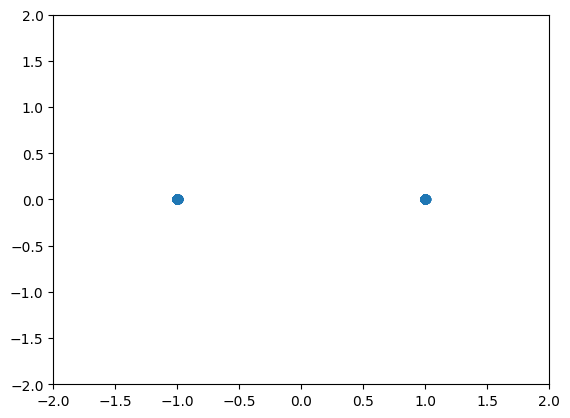

In [1460]:
plt.scatter(np.linalg.eigvals(R).real, np.linalg.eigvals(R).imag)

# Set the axis limits
plt.xlim([-2, 2])
plt.ylim([-2, 2])

# Show the plot
plt.show()

In [1239]:
np.abs(eigenvalues_eigdecom)

array([3.78501130e+04, 3.78501130e+04, 3.02674308e+04, 3.02655847e+04,
       1.18852072e+03, 1.18852072e+03, 1.18408354e+02, 1.18408354e+02,
       4.72330856e+01, 4.72330856e+01, 9.51522493e+00, 9.51522493e+00,
       1.47456245e+00, 1.47456245e+00, 8.95556253e-01, 8.95556253e-01,
       9.99711734e-01, 9.99711734e-01, 9.02133814e-01, 9.11097460e-01,
       9.11097460e-01, 7.96795208e-01, 7.96795208e-01, 6.66038315e-01,
       6.66038315e-01, 4.25695789e-01, 4.25695789e-01, 1.47583457e-01,
       1.47583457e-01, 7.24381961e-03, 2.58485249e-03, 2.26042059e-03,
       2.26042059e-03, 1.01952978e-03, 9.78964630e-04, 9.78964630e-04,
       8.73397424e-04, 8.70451656e-04, 8.70451656e-04, 8.21101957e-04,
       8.21101957e-04, 7.90406427e-04, 7.90406427e-04, 7.12121181e-04,
       7.12121181e-04, 6.75555626e-04, 6.75555626e-04, 5.74895082e-04,
       5.74895082e-04, 5.27597209e-04, 5.27597209e-04, 5.17263862e-04,
       5.17263862e-04, 4.97245609e-04, 4.97245609e-04, 4.51342546e-04,
      

In [1240]:
eigenvectors_eigdecom.shape

(100, 100)

In [1241]:
np.linalg.matrix_rank(data_matrix)

27

### using datafold

In [222]:
from datafold.pcfold import GaussianKernel, TSCDataFrame


In [223]:
tsc_data = TSCDataFrame.from_single_timeseries(pd.DataFrame(data_matrix_all.T))
tsc_data

feature       0         1         2         3         4         5         6    \
ID time                                                                         
0  0     0.020679  0.036973  0.029002  0.002360  0.035740  0.000684  0.045469   
   1     0.026501 -0.001251  0.012199  0.058683  0.002823  0.060371 -0.014806   
   2     0.030755 -0.031188 -0.002087 -0.046118 -0.024312 -0.012717 -0.012157   
   3     0.032076 -0.052260  0.075147  0.008236 -0.034656 -0.058030  0.077633   
   4     0.017654  0.016590  0.001189 -0.051953 -0.051744  0.002068 -0.019143   
...           ...       ...       ...       ...       ...       ...       ...   
   996  -0.053043  0.021538  0.023985 -0.032417  0.008412 -0.016124 -0.049003   
   997  -0.033747 -0.028636 -0.033339  0.019823 -0.005104 -0.010553 -0.012666   
   998   0.016190 -0.028814  0.021190  0.004625 -0.017199 -0.004323  0.046821   
   999  -0.024647  0.021501  0.059056  0.042592 -0.002440  0.038385  0.004459   
   1000  0.017548  0.034778  0.022646 -0.002486  0.030725 -0.003647  0.045165   

feature       7         8         9    ...       990       991       992  \
ID time                                ...                                 
0  0     0.007183  0.016247  0.009499  ...  0.032147  0.008021  0.022045   
   1     0.051880  0.036348  0.046180  ...  0.006387  0.049260  0.026121   
   2    -0.028933 -0.018975 -0.029954  ... -0.017891  0.003693 -0.018161   
   3    -0.001388 -0.015976  0.002765  ...  0.017408 -0.061191  0.031763   
   4     0.034604 -0.002606  0.011233  ... -0.036758 -0.021407 -0.011399   
...           ...       ...       ...  ...       ...       ...       ...   
   996  -0.020688  0.009578  0.010918  ...  0.012314 -0.005925  0.046216   
   997  -0.024265  0.017450 -0.061553  ...  0.004176 -0.081430 -0.010740   
   998   0.003637 -0.003005 -0.009100  ... -0.004278 -0.019437  0.021290   
   999   0.004593 -0.037082  0.018020  ...  0.015724  0.019746  0.004950   
   1000 -0.016973  0.015941 -0.001860  ...  0.035347  0.010048  0.030201   

feature       993       994       995       996       997       998       999  
ID time                                                                        
0  0     0.050357  0.051896  0.053307  0.006274  0.003403  0.015372  0.035648  
   1    -0.020783 -0.028468 -0.030513  0.051681  0.058127  0.036590  0.002322  
   2    -0.058205  0.016006 -0.028735  0.024918 -0.042832 -0.009093  0.008196  
   3    -0.037686  0.018547 -0.043822 -0.037770  0.020428  0.007471  0.009161  
   4     0.002887 -0.010321 -0.054850  0.018250  0.038091 -0.047740 -0.022426  
...           ...       ...       ...       ...       ...       ...       ...  
   996  -0.011944 -0.018547 -0.006393  0.029218 -0.001797  0.025136 -0.032103  
   997  -0.000788  0.040662  0.044128  0.004848 -0.053877 -0.067120  0.027506  
   998   0.025639  0.050554  0.015706 -0.087944 -0.026900  0.024399 -0.002997  
   999  -0.017186 -0.030931  0.001197 -0.038099  0.060966  0.011581  0.014746  
   1000  0.029039  0.029139  0.039853 -0.004944 -0.007311  0.034532  0.033803  

[1001 rows x 1000 columns]

In [224]:
dmd = DMDFull().fit(X=tsc_data, store_system_matrix=True)  # must be TSCDataFrame
dmd_values = dmd.predict(tsc_data.initial_states(), time_values=None)

In [225]:
koopman_matrix

array([[ 0.01001596, -0.00168487,  0.02372077, ..., -0.00194804,
         0.02665324,  0.01865422],
       [ 0.00669131, -0.00506551,  0.05516173, ..., -0.04846083,
         0.05281786,  0.00995317],
       [-0.02532537,  0.01848706, -0.04317773, ...,  0.05585906,
         0.03881346,  0.00148133],
       ...,
       [-0.01375359,  0.03441412, -0.01991044, ...,  0.01095444,
        -0.01620264,  0.04847635],
       [-0.00870703, -0.05120617,  0.0337619 , ..., -0.04454311,
         0.0196378 , -0.00587709],
       [-0.02957988, -0.00411124,  0.00399867, ...,  0.04824797,
         0.03854753, -0.02891028]])

In [226]:
dmd.koopman_matrix_

array([[ 0.01001596, -0.00168487,  0.02372077, ..., -0.00194804,
         0.02665324,  0.01865422],
       [ 0.00669131, -0.00506551,  0.05516173, ..., -0.04846083,
         0.05281786,  0.00995317],
       [-0.02532537,  0.01848706, -0.04317773, ...,  0.05585906,
         0.03881346,  0.00148133],
       ...,
       [-0.01375359,  0.03441412, -0.01991044, ...,  0.01095444,
        -0.01620264,  0.04847635],
       [-0.00870703, -0.05120617,  0.0337619 , ..., -0.04454311,
         0.0196378 , -0.00587709],
       [-0.02957988, -0.00411124,  0.00399867, ...,  0.04824797,
         0.03854753, -0.02891028]])

In [227]:
dmd.koopman_matrix_.shape

(1000, 1000)

In [228]:
np.linalg.matrix_rank(dmd.koopman_matrix_)

1000

why is koopman matrix from datafold completely different from koopman matrix calculated?

In [229]:
shift_start_transposed, shift_end_transposed = tsc_data.tsc.shift_matrices(
            snapshot_orientation="row"
        )

In [230]:
shift_start_transposed.shape

(1000, 1000)

In [240]:
(shift_start_transposed != data_matrix.T).sum()

0

In [241]:
(shift_end_transposed!= data_matrix_shifted.T).sum()

0

In [233]:
G = shift_start_transposed.T @ shift_start_transposed
G = np.multiply(1 / tsc_data.shape[0], G, out=G)

G_dash = shift_start_transposed.T @ shift_end_transposed
G_dash = np.multiply(1 / tsc_data.shape[0], G_dash, out=G_dash)

# If the matrix is square and of full rank, then 'koopman_matrix' is the exact
# solution of the linear equation system.
koopman_matrix, residual, rank, _ = np.linalg.lstsq(G, G_dash, rcond=None)


In [234]:
koopman_matrix

array([[ 0.01001596,  0.00669131, -0.02532537, ..., -0.01375359,
        -0.00870703, -0.02957988],
       [-0.00168487, -0.00506551,  0.01848706, ...,  0.03441412,
        -0.05120617, -0.00411124],
       [ 0.02372077,  0.05516173, -0.04317773, ..., -0.01991044,
         0.0337619 ,  0.00399867],
       ...,
       [-0.00194804, -0.04846083,  0.05585906, ...,  0.01095444,
        -0.04454311,  0.04824797],
       [ 0.02665324,  0.05281786,  0.03881346, ..., -0.01620264,
         0.0196378 ,  0.03854753],
       [ 0.01865422,  0.00995317,  0.00148133, ...,  0.04847635,
        -0.00587709, -0.02891028]])

In [235]:
koopman_matrix.conj().T

array([[ 0.01001596, -0.00168487,  0.02372077, ..., -0.00194804,
         0.02665324,  0.01865422],
       [ 0.00669131, -0.00506551,  0.05516173, ..., -0.04846083,
         0.05281786,  0.00995317],
       [-0.02532537,  0.01848706, -0.04317773, ...,  0.05585906,
         0.03881346,  0.00148133],
       ...,
       [-0.01375359,  0.03441412, -0.01991044, ...,  0.01095444,
        -0.01620264,  0.04847635],
       [-0.00870703, -0.05120617,  0.0337619 , ..., -0.04454311,
         0.0196378 , -0.00587709],
       [-0.02957988, -0.00411124,  0.00399867, ...,  0.04824797,
         0.03854753, -0.02891028]])

In [1257]:
residual

array([], dtype=float64)

In [1258]:
np.linalg.matrix_rank(koopman_matrix)

18

In [1267]:
dmd.koopman_matrix_.T

array([[  85.05578048,  -16.74840854,  103.49088951, ...,   40.01992082,
          22.23181581,   51.93483454],
       [  63.36378604,   51.26598989,  171.09267282, ...,   27.39195811,
          19.67642605,   37.88755087],
       [ 234.12459599,   33.71098131,  402.7047154 , ...,  106.76281274,
          64.33565431,  141.6014329 ],
       ...,
       [ 429.14469994,  -14.31036854,  627.98218804, ...,  197.84426357,
         112.7499906 ,  259.6932855 ],
       [ -25.60927853,  -50.5952705 , -113.67904789, ...,   -9.84276924,
          -9.12063035,  -14.75270988],
       [ -18.74660697,   50.2083582 ,   45.58470893, ...,  -10.50751978,
          -2.54964901,  -12.04305283]])

In [242]:
np.linalg.cond(dmd.koopman_matrix_)

1.7067274355997346

In [249]:
(koopman_matrix == dmd.koopman_matrix_).all()

False

In [183]:
dmd.dmd_modes

array([[ 0.0148441 -0.00120752j,  0.0148441 +0.00120752j,
         0.0351917 +0.00085916j, ...,  0.00611404+0.03624651j,
         0.0127341 -0.00543707j,  0.0127341 +0.00543707j],
       [-0.01029165-0.03407444j, -0.01029165+0.03407444j,
         0.00316046-0.02087229j, ...,  0.01609542-0.01070582j,
         0.04186366-0.01136172j,  0.04186366+0.01136172j],
       [ 0.02438758-0.00274843j,  0.02438758+0.00274843j,
        -0.00660574+0.00549324j, ...,  0.00214593-0.02676605j,
         0.00145589+0.01363972j,  0.00145589-0.01363972j],
       ...,
       [ 0.02326095+0.01819574j,  0.02326095-0.01819574j,
        -0.00196212+0.02732778j, ..., -0.04987349+0.00926681j,
        -0.00630458+0.01527505j, -0.00630458-0.01527505j],
       [-0.0131444 -0.0018022j , -0.0131444 +0.0018022j ,
         0.03321842+0.01545284j, ...,  0.00738553-0.00028616j,
        -0.01106785-0.03389995j, -0.01106785+0.03389995j],
       [-0.00133547-0.03243654j, -0.00133547+0.03243654j,
         0.01228047-0.03336349

In [256]:
for i in range(eigenvalues_eigdecom.shape[0]):
    e = np.linalg.norm(dmd.koopman_matrix_@dmd.eigenvectors_right_[:,i]
                       -  dmd.eigenvalues_[i]*dmd.eigenvectors_right_[:,i])
    print(e)

1.3431940297486685e-14
1.3431940297486685e-14
1.3892747577481257e-14
1.3892747577481257e-14
1.2790979750213954e-14
1.2790979750213954e-14
2.5570449957765005e-14
2.5570449957765005e-14
1.143918040056604e-14
1.143918040056604e-14
1.7047629819326122e-14
1.7047629819326122e-14
1.9894168755752124e-14
1.9894168755752124e-14
1.1641957147152226e-14
1.1641957147152226e-14
1.306303916365079e-14
1.5032428279502426e-14
1.5032428279502426e-14
1.7244584395949924e-14
1.7244584395949924e-14
1.1921364771958914e-14
1.1921364771958914e-14
1.9163744660395824e-14
1.9163744660395824e-14
1.4486357163481445e-14
1.4486357163481445e-14
1.504142922362515e-14
1.504142922362515e-14
1.6860716713360165e-14
1.6860716713360165e-14
2.1292613308754586e-14
2.1292613308754586e-14
3.402772066714842e-14
3.402772066714842e-14
2.4010463534843896e-14
2.4010463534843896e-14
8.592572549956201e-15
8.592572549956201e-15
2.5636570956979818e-14
2.5636570956979818e-14
1.5161317236070994e-14
1.5161317236070994e-14
1.6138837481075516e-

1.945097065647397e-14
1.945097065647397e-14
2.3542912864723377e-14
2.3542912864723377e-14
1.5247908932084758e-14
1.5247908932084758e-14
1.8896261973869362e-14
1.8896261973869362e-14
1.714234305898312e-14
1.714234305898312e-14
1.2881674467514447e-14
1.2881674467514447e-14
1.5078186181184776e-14
1.5078186181184776e-14
2.780843716930811e-14
2.780843716930811e-14
2.4122185443721145e-14
2.4122185443721145e-14
2.7347868444707733e-14
2.7347868444707733e-14
1.571040824395925e-14
1.571040824395925e-14
1.5716205479467336e-14
1.5716205479467336e-14
1.3722667821132146e-14
1.3722667821132146e-14
1.124435013352481e-14
1.124435013352481e-14
1.551716806658429e-14
1.551716806658429e-14
1.372706004847136e-14
1.372706004847136e-14
1.2357582648009264e-14
1.2357582648009264e-14
1.2611950274690234e-14
1.2611950274690234e-14
1.9362486249475566e-14
1.9362486249475566e-14
1.2393125869239808e-14
1.2393125869239808e-14
1.9409417813694146e-14
1.9409417813694146e-14
1.2589352474057796e-14
1.2589352474057796e-14
1.

1.4763647420523335e-14
1.4763647420523335e-14
2.0906607819570836e-14
2.0906607819570836e-14
2.0435921350894464e-14
2.0435921350894464e-14
2.3578331841299165e-14
2.3578331841299165e-14
2.1815812098649765e-14
2.1815812098649765e-14
1.8140853800855845e-14
1.8140853800855845e-14
1.374597275753798e-14
1.374597275753798e-14
1.4981008252429382e-14
1.4981008252429382e-14
1.877072953406675e-14
1.877072953406675e-14
2.5134441173872814e-14
2.5134441173872814e-14
1.335231006939584e-14
1.335231006939584e-14
1.8708136171942083e-14
1.8708136171942083e-14
1.5801618259060396e-14
1.5801618259060396e-14
1.7013103000320812e-14
1.7013103000320812e-14
1.9881152333468986e-14
1.9881152333468986e-14
1.3507979880841017e-14
1.3507979880841017e-14
2.1391812125894094e-14
2.1391812125894094e-14
1.734246991708747e-14
1.734246991708747e-14
2.691864105610878e-14
2.691864105610878e-14
1.593359788270489e-14
1.593359788270489e-14
2.6253388080314548e-14
2.6253388080314548e-14
1.8267804408617363e-14
1.8267804408617363e-14


In [261]:
for i in range(eigenvalues_eigdecom.shape[0]):
    e = np.linalg.norm(dmd.koopman_matrix_@(dmd.eigenvectors_right_[:,i]**2)
                       -  (dmd.eigenvalues_[i]**2)*(dmd.eigenvectors_right_[:,i]**2))
    print(e)

0.06324589061953036
0.06324589061953036
0.06430700782103238
0.06430700782103238
0.06334045462265203
0.06334045462265203
0.06354412904146614
0.06354412904146614
0.06397137173998145
0.06397137173998145
0.06525397299130742
0.06525397299130742
0.06169360820484956
0.06169360820484956
0.06282992683468926
0.06282992683468926
0.0738878489203924
0.06359932979760612
0.06359932979760612
0.06534048915103129
0.06534048915103129
0.06229422504639984
0.06229422504639984
0.06267491665719369
0.06267491665719369
0.06263281998100192
0.06263281998100192
0.0641003360254931
0.0641003360254931
0.06255321974334227
0.06255321974334227
0.06413478223851359
0.06413478223851359
0.06301719543993035
0.06301719543993035
0.062782721906141
0.062782721906141
0.06191727171520862
0.06191727171520862
0.06648433326261402
0.06648433326261402
0.06289729434973565
0.06289729434973565
0.0636791036438705
0.0636791036438705
0.061893389841723316
0.061893389841723316
0.06209596269974466
0.06209596269974466
0.06550828913273984
0.06550

0.06441396789186309
0.0618592114413327
0.0618592114413327
0.06371918068504026
0.06371918068504026
0.0635346090972275
0.0635346090972275
0.06647866919528221
0.06647866919528221
0.06384758168878366
0.06384758168878366
0.06306134038515615
0.06306134038515615
0.06180538171165639
0.06180538171165639
0.06291713949991251
0.06291713949991251
0.06442051466814629
0.06442051466814629
0.06382916713254436
0.06382916713254436
0.06217080080700515
0.06217080080700515
0.06243959270469289
0.06243959270469289
0.06344836343982573
0.06344836343982573
0.06267233399598215
0.06267233399598215
0.06319409963985584
0.06319409963985584
0.06240315272874313
0.06240315272874313
0.06279916991703141
0.06279916991703141
0.061519917703348824
0.061519917703348824
0.06361402165431228
0.06361402165431228
0.061326736566994666
0.061326736566994666
0.06306149987850965
0.06306149987850965
0.06159680088138226
0.06159680088138226
0.06531228773509551
0.06531228773509551
0.06412615369139701
0.06412615369139701
0.0629158926164587
0

0.064402670696784
0.06093547945228644
0.06093547945228644
0.06425699771990097
0.06425699771990097
0.06112023543442907
0.06112023543442907
0.062478479261373475
0.062478479261373475
0.063239756178194
0.063239756178194
0.0628783192339644
0.0628783192339644
0.06314352849115971
0.06314352849115971
0.06372397524220842
0.06372397524220842
0.06377102297562878
0.06377102297562878
0.06460914568367666
0.06460914568367666
0.0618502427699442
0.0618502427699442
0.06208079349207059
0.06208079349207059
0.06277016162054982
0.06277016162054982
0.06408179622992494
0.06408179622992494
0.06272940954068178
0.06272940954068178
0.062378897343165166
0.062378897343165166
0.06485227313575011
0.06485227313575011
0.06332169094375469
0.06332169094375469
0.06533436625755702
0.06533436625755702
0.061666087052438034
0.061666087052438034
0.06548058147406707
0.06548058147406707
0.06529824340017877
0.06529824340017877
0.06360686438847546
0.06360686438847546
0.06323709586802416
0.06323709586802416
0.0654299614289918
0.065